<a href="https://colab.research.google.com/github/56sarager/Data-Analysis-Colabs/blob/main/NeutronIrradation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Half-Life of In Isotope

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
df1=pd.read_csv(path+'In_exp1.tsv', sep='\t', skiprows=10)
df2=pd.read_csv(path+'background_2.tsv', sep='\t',skiprows=10)
df3=pd.read_csv(path+'background_5.tsv', sep='\t',skiprows=10)
df4=pd.read_csv(path+'background_2fexp5.tsv', sep='\t',skiprows=10)
coin=df4.loc[:, 'Voltage']
coin=np.sum(coin)
correction = np.ceil((df2.loc[:, 'Voltage']+df3.loc[:, 'Voltage']+coin)/8)
cdf=[]
i=1
while i <= 12:
  j=df1.loc[i, 'Voltage']-correction
  cdf.append(j)
  i+=1
cdf2=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in cdf:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        cdf2.append(p3)
del cdf2[1::2]
cdf2 = np.array(cdf2, dtype=np.float32)
cdf3 = list(itertools.accumulate(cdf2))
cdf3 = np.array(cdf3, dtype=np.float32)
cdf3 = cdf3/1.1
t=[300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,3600]
t = np.array(t, dtype=np.float32)
#[plt.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(t, cdf2)]
#plt.title("Half-Life of In Isotope")
#plt.xlabel("Time (seconds)")
#plt.yscale("log")
#plt.ylabel("Counts")
#ax = plt.axes()
#ax.set_facecolor("black")
#plt.plot(t, cdf2, 'o', color='cyan')


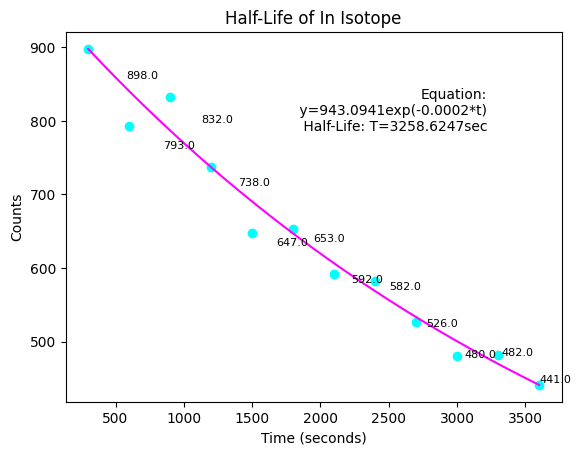

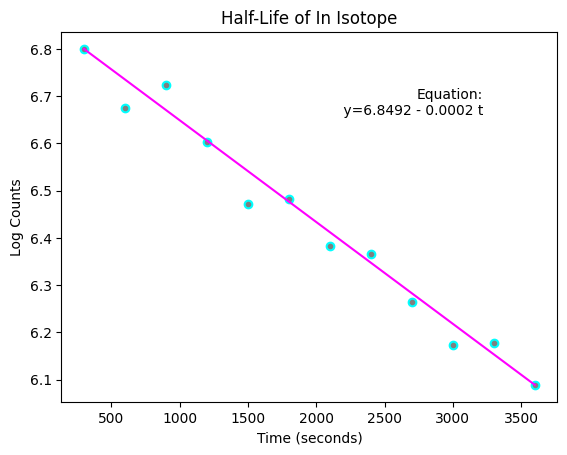

Log Counts for Points Left to Right: [6.8  6.68 6.72 6.6  6.47 6.48 6.38 6.37 6.27 6.17 6.18 6.09]
Count Uncertainties +/- for Points Left to Right: [0.03337043 0.03551104 0.03466876 0.03681051 0.03931405 0.03913302
 0.04109975 0.04145133 0.04360207 0.04564355 0.04554875 0.04761905]
Log Count Uncertainties +/- for Points Left to Right: [3.7160837e-05 4.4780634e-05 4.1669187e-05 4.9878741e-05 6.0763607e-05
 5.9928061e-05 6.9425245e-05 7.1222225e-05 8.2893668e-05 9.5090727e-05
 9.4499490e-05 1.0797970e-04]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
x_data = t
y_data = cdf2

# Convert data to PyTorch tensors
x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)
# Define the exponential decay model
#init = [940.69, 0.0002]
init = [940, 0.0001]
a_init = init[0]
b_init = init[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_tensor)
    # Compute the loss
    loss = loss_function(y_pred, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fit = model.a.item()
b_fit = model.b.item()

# Generate the fitted curve
t2=np.linspace(0,3600,3600)
y_fit = a_fit * np.exp(-b_fit * t2)

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
[plt.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(t, cdf2)]
plt.title("Half-Life of In Isotope")
ax.scatter(x_data, y_data, color="cyan")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Counts")
sa_fit=str(round(a_fit,4))
T=np.log(2)/b_fit
sb_fit=str(round(b_fit,4))
T=str(round(T,4))
ax.text(0.85, 0.85, 'Equation:\n y='+sa_fit+'exp(-'+sb_fit+'*t)\n Half-Life: T='+T+'sec', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
ax2.plot(t2, y_fit, color="magenta")
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()
fig.savefig('Half-Life of In Isotope.png')
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
plt.title("Half-Life of In Isotope")
ax.scatter(x_data, np.log(y_data), color="cyan")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Log Counts")
sa_fit2=np.log(a_fit)
sa_fit2=str(round(sa_fit2,4))
y_data2=np.log(y_data)
y_data2=np.array(y_data2)
y_data2=np.round(y_data2, 2)
#[plt.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(t, y_data2)]
ax.text(0.85, 0.85, 'Equation:\n y='+sa_fit2+' - '+sb_fit+' t', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
ax2.plot(t2, np.log(y_fit), color="magenta")
ax2.set_xticks([])
ax2.set_yticks([])
yerrs=1/np.sqrt(y_data)*(1/(y_data))
ax.errorbar(x_data, np.log(y_data), xerr=0, yerr=yerrs, fmt='.', color='gray')
plt.show()
fig.savefig('Half-Life of In Isotope2.png')
print('Log Counts for Points Left to Right:',y_data2)
yerr=1/np.sqrt(y_data)
print('Count Uncertainties +/- for Points Left to Right:',yerr)
print('Log Count Uncertainties +/- for Points Left to Right:',yerrs)

#2. Growth of In Activity

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
Indf1=pd.read_csv(path+'exp2_10.tsv', sep='\t', skiprows=10)
Indf2=pd.read_csv(path+'exp2_25.tsv', sep='\t',skiprows=10)
Indf3=pd.read_csv(path+'exp2_40.tsv', sep='\t',skiprows=10)
Indf4=pd.read_csv(path+'exp2_60.tsv', sep='\t',skiprows=10)
Indf5=pd.read_csv(path+'exp2_90.tsv', sep='\t',skiprows=10)
Indf6=pd.read_csv(path+'exp2_120.tsv', sep='\t',skiprows=10)
Indf7=pd.read_csv(path+'exp2_150.tsv', sep='\t',skiprows=10)
Indf8=pd.read_csv(path+'exp2_180.tsv', sep='\t',skiprows=10)
Indf9=pd.read_csv(path+'background_1.tsv', sep='\t',skiprows=10)
Indf10=pd.read_csv(path+'background_4.tsv', sep='\t',skiprows=10)
#Flux Ratio Indexed on Well Position
FR=[1,1.1,1.01,1.03,1.00,1.08,1.18]
correction = np.ceil((Indf9.loc[:, 'Voltage']+Indf10.loc[:, 'Voltage'])/2)
Indcdf1=[]
i=1
while i <= 1:
  j=Indf1.loc[i, 'Voltage']-correction
  Indcdf1.append(j)
  i+=1
Indcdf12=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Indcdf1:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Indcdf12.append(p3)
del Indcdf12[1::2]
Indcdf12 = np.array(Indcdf12, dtype=np.float32)
Indcdf13 = list(itertools.accumulate(Indcdf12))
Indcdf13 = np.array(Indcdf13, dtype=np.float32)
Indcdf13 = Indcdf13/FR[2]

In [ ]:
Indcdf2=[]
i=1
while i <= 1:
  j=Indf2.loc[i, 'Voltage']-correction
  Indcdf2.append(j)
  i+=1
Indcdf22=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Indcdf2:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Indcdf22.append(p3)
del Indcdf22[1::2]
Indcdf22 = np.array(Indcdf22, dtype=np.float32)
Indcdf23 = list(itertools.accumulate(Indcdf22))
Indcdf23 = np.array(Indcdf23, dtype=np.float32)
Indcdf23 = Indcdf23/FR[3]

In [ ]:
Indcdf3=[]
i=1
while i <= 1:
  j=Indf3.loc[i, 'Voltage']-correction
  Indcdf3.append(j)
  i+=1
Indcdf32=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Indcdf3:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Indcdf32.append(p3)
del Indcdf32[1::2]
Indcdf32 = np.array(Indcdf32, dtype=np.float32)
Indcdf33 = list(itertools.accumulate(Indcdf32))
Indcdf33 = np.array(Indcdf33, dtype=np.float32)
Indcdf33 = Indcdf33/FR[4]

In [ ]:
Indcdf4=[]
i=1
while i <= 1:
  j=Indf4.loc[i, 'Voltage']-correction
  Indcdf4.append(j)
  i+=1
Indcdf42=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Indcdf4:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Indcdf42.append(p3)
del Indcdf42[1::2]
Indcdf42 = np.array(Indcdf42, dtype=np.float32)
Indcdf43 = list(itertools.accumulate(Indcdf42))
Indcdf43 = np.array(Indcdf43, dtype=np.float32)
Indcdf43 = Indcdf43/FR[5]

In [ ]:
Indcdf5=[]
i=1
while i <= 1:
  j=Indf5.loc[i, 'Voltage']-correction
  Indcdf5.append(j)
  i+=1
Indcdf52=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Indcdf5:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Indcdf52.append(p3)
del Indcdf52[1::2]
Indcdf52 = np.array(Indcdf52, dtype=np.float32)
Indcdf53 = list(itertools.accumulate(Indcdf52))
Indcdf53 = np.array(Indcdf53, dtype=np.float32)
Indcdf53 = Indcdf53/FR[3]

In [ ]:
Indcdf6=[]
i=1
while i <= 1:
  j=Indf6.loc[i, 'Voltage']-correction
  Indcdf6.append(j)
  i+=1
Indcdf62=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Indcdf6:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:5])
        Indcdf62.append(p3)
del Indcdf62[1::2]
Indcdf62 = np.array(Indcdf62, dtype=np.float32)
Indcdf63 = list(itertools.accumulate(Indcdf62))
Indcdf63 = np.array(Indcdf63, dtype=np.float32)
Indcdf63 = Indcdf63/FR[4]

In [ ]:
Indcdf7=[]
i=2
while i <= 2:
  j=Indf7.loc[i, 'Voltage']-correction
  Indcdf7.append(j)
  i+=1
Indcdf72=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Indcdf7:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:4])
        Indcdf72.append(p3)
del Indcdf72[1::2]
Indcdf72 = np.array(Indcdf72, dtype=np.float32)
Indcdf73 = list(itertools.accumulate(Indcdf72))
Indcdf73 = np.array(Indcdf73, dtype=np.float32)
Indcdf73 = Indcdf73/FR[5]

In [ ]:
Indcdf8=[]
i=1
while i <= 1:
  j=Indf8.loc[i, 'Voltage']-correction
  Indcdf8.append(j)
  i+=1
Indcdf82=[]
delete_list = ['1   ','Name: Voltage, dtype: float64']
for row in Indcdf8:
  for word in delete_list:
        p=str(row)
        p2 = p.replace(word, "")
        p3=(p2[1:5])
        Indcdf82.append(p3)
del Indcdf82[1::2]
Indcdf82 = np.array(Indcdf82, dtype=np.float32)
Indcdf83 = list(itertools.accumulate(Indcdf82))
Indcdf83 = np.array(Indcdf83, dtype=np.float32)
Indcdf83 = Indcdf83/FR[6]

Count Uncertainties +/- for Points Left to Right: [[0.0949624 ]
 [0.03629236]
 [0.05219958]
 [0.04561716]
 [0.0368139 ]
 [0.02847859]
 [0.03527378]
 [0.02636939]]
Equation:
 y=1186(1-exp(-4e-06*t))
 Saturation Count:1186


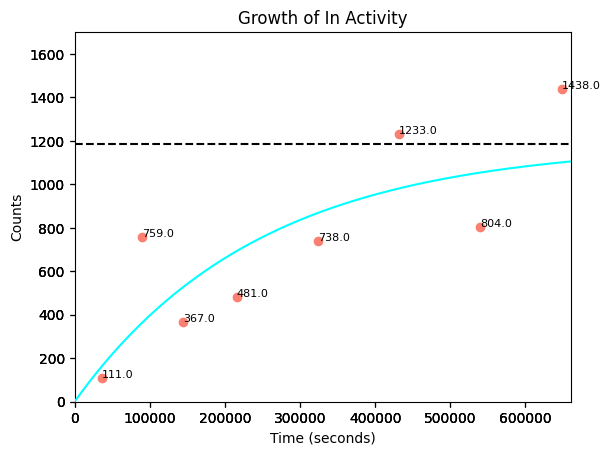

In [ ]:
fig=plt.figure()
t=[10*3600, 25*3600, 40*3600, 60*3600, 90*3600, 120*3600, 150*3600, 180*3600]
scat=[]
scat.append(Indcdf13)
scat.append(Indcdf23)
scat.append(Indcdf33)
scat.append(Indcdf43)
scat.append(Indcdf53)
scat.append(Indcdf63)
scat.append(Indcdf73)
scat.append(Indcdf83)

# Generate example data
x_data2 = np.array(t)
y_data2 = np.array(scat)

# Convert data to PyTorch tensors
x_tensor2 = torch.from_numpy(x_data2).float().view(-1, 1)
y_tensor2 = torch.from_numpy(y_data2).float().view(-1, 1)
# Define the exponential decay model
init2 = [1185.8, 0.000001]
a_init2 = init2[0]
b_init2 = init2[1]
class AsymptoteModel(nn.Module):
    def __init__(self):
        super(AsymptoteModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init2, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init2, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a *(1- torch.exp(-self.b * x))

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = AsymptoteModel()
optimizer = optim.Adam(model.parameters(), lr=0.000001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_tensor2)
    # Compute the loss
    loss = loss_function(y_pred, y_tensor2)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
b_fit2 = model.b.item()
a_fit2 = model.a.item()

# Generate the fitted curve
t3=np.linspace(0,660000,660000)
Y = a_fit2 * (1-np.exp(-b_fit2 * t3))
ax31=fig.add_subplot(111, label="301")
ax32=fig.add_subplot(111, label="302", frame_on=False)
ax33=fig.add_subplot(111, label="302", frame_on=False)
plt.title("Growth of In Activity")
ax31.scatter(t, scat, color="salmon")
ax32.plot(t3, Y, color="cyan")
ax33.axhline(y = a_fit2, color = 'k', linestyle = '--')
ax31.set_xlim([0,660000])
ax31.set_ylim([0,1700])
ax32.set_xlim([0,660000])
ax32.set_ylim([0,1700])
ax33.set_xlim([0,660000])
ax33.set_ylim([0,1700])
ax31.set_xlabel("Time (seconds)")
ax31.set_ylabel("Counts")
yerr=1/np.sqrt(scat)
scat = np.round(scat)
scat2=[]
for row in scat:
      p=str(row)
      p2 = p.replace('[', '')
      p3 = p2.replace(']', '')
      scat2.append(p3)
scat2 = np.array(scat2, dtype=np.float32)
[ax31.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(t, scat2)]
print('Count Uncertainties +/- for Points Left to Right:',yerr)
a_fit2=str(round(a_fit2))
b_fit2=str(round(b_fit2,6))
print('Equation:\n y='+a_fit2+'(1-exp(-'+b_fit2+'*t))\n Saturation Count:'+a_fit2+'')


In [ ]:
fig.savefig('Growth of In Activity.png')

#3. Half-Life of Ag Isotope


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
Agdf1=pd.read_csv(path+'exp3_15.tsv', sep='\t', skiprows=10) #15 entries
Agdf7=pd.read_csv(path+'exp3_ag1f.tsv', sep='\t', skiprows=10)
Agdf2=pd.read_csv(path+'background_3a.tsv', sep='\t',skiprows=10)
Agdf3=pd.read_csv(path+'background_3b.tsv', sep='\t',skiprows=10)
Agdf4=pd.read_csv(path+'background_3c.tsv', sep='\t',skiprows=10)
Agdf5=pd.read_csv(path+'background_agf1.tsv', sep='\t',skiprows=10)
Agdf6=pd.read_csv(path+'background_agf2.tsv', sep='\t',skiprows=10)
ag1=Agdf2.loc[:, 'Voltage']
ag1=np.sum(ag1)
ag2=Agdf3.loc[:, 'Voltage']
ag2=np.sum(ag2)
ag3=Agdf4.loc[:, 'Voltage']
ag3=np.sum(ag3)
ag4=Agdf5.loc[:, 'Voltage']
ag4=np.sum(ag4)
ag5=Agdf6.loc[:, 'Voltage']
ag5=np.sum(ag5)
correction = np.ceil((ag1+ag2+ag3+ag4+ag5)/120)
Agcdf=[]
i=1
while i <= 15:
  j=Agdf1.loc[i, 'Voltage']-correction
  Agcdf.append(j)
  i+=1
hlAg=np.array(Agcdf).tolist()
hlAg = hlAg[5:]
Agcdf2=[]
i=1
while i <= 15:
  j=Agdf7.loc[i, 'Voltage']-correction
  j=j/1.03
  j=round(j)
  Agcdf2.append(j)
  i+=1
hlAg2=np.array(Agcdf2)
hlAgf = hlAg2[5:]
Agt = [30,60,90,120,150,180,210,240,270,300,330,360,390,420,450]
Agt=np.array(Agt).tolist()
Agt2 = Agt[5:]
hlAg = np.array(hlAg, dtype=np.float32)
hlAg2 = np.array(hlAg2, dtype=np.float32)
Agt2 = np.array(Agt2, dtype=np.float32)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
x_data3a = [210,270,300,360,390,420]
y_data3a = [134,100,90,75,62,48]
x_data3a=np.array(x_data3a)
y_data3a=np.array(y_data3a)
# Convert data to PyTorch tensors
x_tensor3a = torch.from_numpy(x_data3a).float().view(-1, 1)
y_tensor3a = torch.from_numpy(y_data3a).float().view(-1, 1)
# Define the exponential decay model
#init3 = [476.94, 0.006]
init3a = [350, 0.0001]
a_init3a = init3a[0]
b_init3a = init3a[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init3a, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init3a, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred3a = model(x_tensor3a)
    # Compute the loss
    loss = loss_function(y_pred3a, y_tensor3a)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fit3a = model.a.item()
b_fit3a = model.b.item()
# Generate the fitted curve
t23=np.linspace(0,500,500)
y_fit3a = a_fit3a * np.exp(-b_fit3a * t23)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
x_data3b = [210,270,300,360,450]
y_data3b = [133,95,79,51,35]
x_data3b=np.array(x_data3b)
y_data3b=np.array(y_data3b)
# Convert data to PyTorch tensors
x_tensor3b = torch.from_numpy(x_data3b).float().view(-1, 1)
y_tensor3b = torch.from_numpy(y_data3b).float().view(-1, 1)
# Define the exponential decay model
#init3 = [476.94, 0.006]
init3b = [435, 0.0001]
a_init3b = init3b[0]
b_init3b = init3b[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init3b, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init3b, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred3b = model(x_tensor3b)
    # Compute the loss
    loss = loss_function(y_pred3b, y_tensor3b)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fit3b = model.a.item()
b_fit3b = model.b.item()
# Generate the fitted curve
t23=np.linspace(0,500,500)
y_fit3b = a_fit3b * np.exp(-b_fit3b * t23)

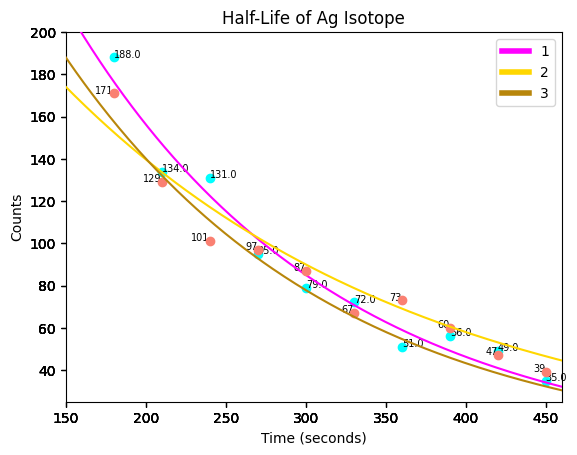

Equation 1: y=528.2186exp(-0.0061*t)
 Half-Life: T=113.8514sec
Equation 2: y=336.8359exp(-0.0044*t)
 Half-Life: T=157.5549sec
Equation 3: y=454.1474exp(-0.0059*t)
 Half-Life: T=117.9128sec
Cyan Count Uncertainties +/- for Points Left to Right: [0.0729325  0.08638684 0.0873704  0.10259783 0.1125088  0.11785114
 0.14002801 0.13363062 0.14285715 0.16903085]
Salmon Count Uncertainties +/- for Points Left to Right: [0.07647191 0.08804509 0.09950372 0.10153462 0.10721125 0.12216944
 0.11704115 0.12909944 0.14586499 0.16012815]


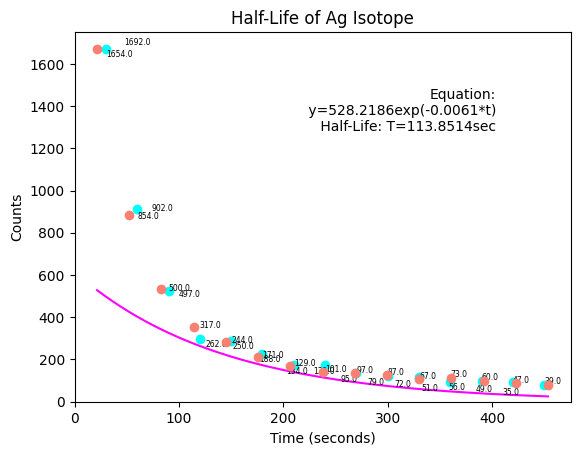

Count Uncertainies +/- for Points Left to Right: [0.02431083 0.03329636 0.04485613 0.06178021 0.06324555 0.0729325
 0.08638684 0.08737041 0.10259784 0.11250879 0.11785113 0.14002801
 0.13363062 0.14285714 0.16903085]
Salmon Count Uncertainties +/- for Points Left to Right: [0.02458851 0.03421929 0.04472136 0.0561656  0.06401844 0.07647192
 0.08804509 0.09950373 0.10153461 0.10721125 0.12216945 0.11704115
 0.12909944 0.145865   0.16012816]


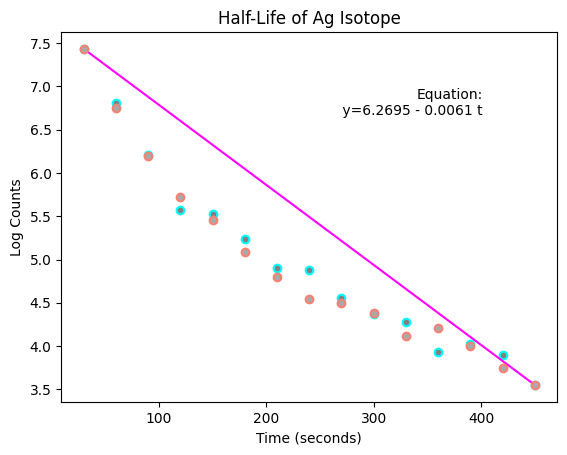

Cyan Log Counts for Points Left to Right: [7.43 6.8  6.21 5.57 5.52 5.24 4.9  4.88 4.55 4.37 4.28 3.93 4.03 3.89
 3.56]
Cyan Log Count Uncertainties +/- for Points Left to Right: [1.43681045e-05 3.69139234e-05 9.02537795e-05 2.35802305e-04
 2.52982252e-04 3.87938810e-04 6.44677901e-04 6.66949665e-04
 1.07997726e-03 1.42416207e-03 1.63682143e-03 2.74564745e-03
 2.38626124e-03 2.91545200e-03 4.82945284e-03]
Salmon Log Counts for Points Left to Right: [7.41 6.75 6.21 5.76 5.5  5.14 4.86 4.62 4.57 4.47 4.2  4.29 4.09 3.85
 3.66]
Salmon Log Count Uncertainties +/- for Points Left to Right: [1.4866090e-05 4.0069430e-05 8.9442728e-05 1.7717855e-04 2.6237062e-04
 4.4720419e-04 6.8252010e-04 9.8518538e-04 1.0467486e-03 1.2323132e-03
 1.8234246e-03 1.6033034e-03 2.1516576e-03 3.1035105e-03 4.1058501e-03]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Generate example data
x_data3 = Agt2
y_data3 = hlAg

# Convert data to PyTorch tensors
x_tensor3 = torch.from_numpy(x_data3).float().view(-1, 1)
y_tensor3 = torch.from_numpy(y_data3).float().view(-1, 1)
# Define the exponential decay model
#init3 = [476.94, 0.006]
init3 = [475, 0.0001]
a_init3 = init3[0]
b_init3 = init3[1]
class ExponentialDecayModel(nn.Module):
    def __init__(self):
        super(ExponentialDecayModel, self).__init__()
        self.a = nn.Parameter(torch.tensor(a_init3, dtype=torch.float32, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(b_init3, dtype=torch.float32, requires_grad=True))

    def forward(self, x):
        return self.a * torch.exp(-self.b * x)

def loss_function(y_pred, y_true):
    x = (y_pred - y_true)**2
    return torch.mean(x)

# Instantiate the model and define the loss function and optimizer
model = ExponentialDecayModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    y_pred3 = model(x_tensor3)
    # Compute the loss
    loss = loss_function(y_pred3, y_tensor3)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    #if (epoch + 1) % 100 == 0:
        #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Extract the fitted parameters
a_fit3 = model.a.item()
b_fit3 = model.b.item()
# Generate the fitted curve
t23=np.linspace(0,500,500)
y_fit3 = a_fit3 * np.exp(-b_fit3 * t23)

fig=plt.figure()
ax=fig.add_subplot(111, label="Ag1")
ax2=fig.add_subplot(111, label="Ag2", frame_on=False)
ax3=fig.add_subplot(111, label="Ag3", frame_on=False)
ax4=fig.add_subplot(111, label="Ag4", frame_on=False)
ax5=fig.add_subplot(111, label="Ag5", frame_on=False)
plt.title("Half-Life of Ag Isotope")
ax.scatter(x_data3, y_data3, color="cyan")
ax3.scatter(x_data3, hlAgf, color="salmon")
[ax.text(i, j, f'{j}', fontsize=7, ha='right') for (i, j) in zip(x_data3, hlAgf)]
ax.set_xlim([150,460])
ax.set_ylim([25,200])
ax3.set_xlim([150,460])
ax3.set_ylim([25,200])
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Counts")
[ax.text(i, j, f'{j}', fontsize=7, ha='left') for (i, j) in zip(x_data3, y_data3)]
a_fit32=str(round(a_fit3,4))
T3=np.log(2)/b_fit3
b_fit32=str(round(b_fit3,4))
T3=str(round(T3,4))
a_fit32a=str(round(a_fit3a,4))
T3a=np.log(2)/b_fit3a
b_fit32a=str(round(b_fit3a,4))
T3a=str(round(T3a,4))
a_fit32b=str(round(a_fit3b,4))
T3b=np.log(2)/b_fit3b
b_fit32b=str(round(b_fit3b,4))
T3b=str(round(T3b,4))
#ax.text(0.85, 0.85, 'Equation:\n y='+a_fit32+'exp(-'+b_fit32+'*t)\n Half-Life: T='+T3+'sec', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
ax2.plot(t23, y_fit3, color="magenta")
ax2.set_xlim([150,460])
ax2.set_ylim([25,200])
ax4.plot(t23, y_fit3a, color="gold")
ax4.set_xlim([150,460])
ax4.set_ylim([25,200])
ax5.plot(t23, y_fit3b, color="darkgoldenrod")
ax5.set_xlim([150,460])
ax5.set_ylim([25,200])
custom_lines = [Line2D([0], [0], color='magenta', lw=4),
                Line2D([0], [0], color='gold', lw=4),
                Line2D([0], [0], color='darkgoldenrod', lw=4)]
ax.legend(custom_lines, ['1', '2', '3'])
plt.show()
fig.savefig('Half-Life of Ag Isotope.png')
print('Equation 1: y='+a_fit32+'exp(-'+b_fit32+'*t)\n Half-Life: T='+T3+'sec\n'+
      'Equation 2: y='+a_fit32a+'exp(-'+b_fit32a+'*t)\n Half-Life: T='+T3a+'sec\n'+
      'Equation 3: y='+a_fit32b+'exp(-'+b_fit32b+'*t)\n Half-Life: T='+T3b+'sec')
yerr31=1/np.sqrt(y_data3)
print('Cyan Count Uncertainties +/- for Points Left to Right:',yerr31)
yerr31s=1/np.sqrt(hlAgf)
print('Salmon Count Uncertainties +/- for Points Left to Right:',yerr31s)

fig2=plt.figure()
ax=fig2.add_subplot(111, label="Ag12")
ax2=fig2.add_subplot(111, label="Ag22", frame_on=False)
ax3=fig2.add_subplot(111, label="Ag32", frame_on=False)
#[plt.text(i, j, f'{j}', fontsize=8, ha='left') for (i, j) in zip(Agt, hlAg)]
plt.title("Half-Life of Ag Isotope")
ax.scatter(Agt, Agcdf, color="cyan")
ax.set_xlabel("Time (seconds)")
ax3.scatter(Agt, hlAg2, color="salmon")
[ax.text(i, j, f'{j}', fontsize=5.5, ha='left') for (i, j) in zip(Agt, hlAg2)]
ax3.set_xticks([])
ax3.set_yticks([])
ax.set_xlim([0, 475])
ax.set_yticks([])
ax.text(0.85, 0.85, 'Equation:\n y='+a_fit32+'exp(-'+b_fit32+'*t)\n Half-Life: T='+T3+'sec', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
ax2.plot(t23, y_fit3, color="magenta")
ax2.set_xticks([])
ax2.set_ylabel("Counts")
ax2.set_ylim([0, 1750])
[ax2.text(i, j, f'{j}', fontsize=5.5, ha='left') for (i, j) in zip(Agt, Agcdf)]
plt.show()
fig2.savefig('Half-Life of Ag Isotope 2.png')
yerr32=1/np.sqrt(Agcdf)
print('Count Uncertainies +/- for Points Left to Right:',yerr32)
yerr32s=1/np.sqrt(hlAg2)
print('Salmon Count Uncertainties +/- for Points Left to Right:',yerr32s)

fig3=plt.figure()
ax=fig3.add_subplot(111, label="Ag13")
ax2=fig3.add_subplot(111, label="Ag23", frame_on=False)
ax3=fig3.add_subplot(111, label="Ag33", frame_on=False)
plt.title("Half-Life of Ag Isotope")
ax.scatter(Agt, np.log(Agcdf), color="cyan")
ax.set_xlabel("Time (seconds)")
ax3.scatter(Agt, np.log(hlAg2), color="salmon")
ax3.set_xticks([])
ax3.set_yticks([])
sa_fit2=np.log(a_fit3)
sa_fit2=str(round(sa_fit2,4))
sb_fit=str(round(b_fit3,4))
ax.text(0.85, 0.85, 'Equation:\n y='+sa_fit2+' - '+sb_fit+' t', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
ax2.plot(t23, np.log(y_fit3), color="magenta")
ax2.set_xticks([])
ax.set_ylabel("Log Counts")
ax2.set_yticks([])
Agcdf = np.array(Agcdf, dtype=np.float32)
yerr33=1/np.sqrt(Agcdf)*(1/(Agcdf))
ax.errorbar(Agt, np.log(Agcdf), xerr=0, yerr=yerr33, fmt='.', color='gray')
yerr33s=1/np.sqrt(hlAg2)*(1/(hlAg2))
ax3.errorbar(Agt, np.log(hlAg2), xerr=0, yerr=yerr33s, fmt='.', color='darkgray')
plt.show()
fig3.savefig('Half-Life of Ag Isotope 3.png')
r=np.round(np.log(Agcdf),2)
print('Cyan Log Counts for Points Left to Right:', r)
print('Cyan Log Count Uncertainties +/- for Points Left to Right:',yerr33)
rs=np.round(np.log(hlAg2),2)
print('Salmon Log Counts for Points Left to Right:', rs)
print('Salmon Log Count Uncertainties +/- for Points Left to Right:',yerr33s)

#4. Effect of Shielding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools
#%matplotlib inline
path='/content/drive/MyDrive/PHYS3112/Neutron_Irradiation/'
In4df1=pd.read_csv(path+'exp4_1.tsv', sep='\t', skiprows=10) #15 entries
Cad4df1=pd.read_csv(path+'exp4_cad.tsv', sep='\t', skiprows=10) #15 entries
Ind4df1=pd.read_csv(path+'exp4_ind.tsv', sep='\t', skiprows=10) #15 entries
Lead4df1=[330]
Ag4df1=pd.read_csv(path+'exp4_Ag.tsv', sep='\t', skiprows=10)
In4df2=pd.read_csv(path+'background_3a.tsv', sep='\t',skiprows=10) #20 entries
In4df3=pd.read_csv(path+'background_3b.tsv', sep='\t',skiprows=10) #10 entries
In4df4=pd.read_csv(path+'background_3c.tsv', sep='\t',skiprows=10) #11 entries
In41=In4df2.loc[:, 'Voltage']
In41=np.sum(In41)/len(In41)
In42=In4df3.loc[:, 'Voltage']
In42=np.sum(In42)/len(In42)
In43=In4df4.loc[:, 'Voltage']
In43=np.sum(In43)/len(In43)
correction = np.ceil((In41+In42+In43)/3)
In4cdf=(In4df1.loc[1, 'Voltage']-correction)/1.01
Cad4cdf=(Cad4df1.loc[1, 'Voltage']-correction)/1.01
Ind4cdf=(Ind4df1.loc[1, 'Voltage']-correction)/1.01
Ag4cdf=(Ag4df1.loc[1, 'Voltage']-correction)/1.03
Lead4cdf=(Lead4df1-correction)/1.01
df4 = pd.DataFrame({'Unshielded Indium': [In4cdf, 1/np.sqrt(In4cdf)], 'Lead Shield': [Lead4cdf[0], 1/np.sqrt(Lead4cdf[0])],'Cadmium Shield': [Cad4cdf, 1/np.sqrt(Cad4cdf)],
                    'Indium Shield': [Ind4cdf, 1/np.sqrt(Ind4cdf)],'Silver Shield': [Ag4cdf, 1/np.sqrt(Ag4cdf)]}
                   ,index=['Counts in 300 seconds', 'Count Uncertainties +/-'])
df4

,Unshielded Indium,Lead Shield,Cadmium Shield,Indium Shield,Silver Shield
Counts in 300 seconds,359.405941,313.861386,159.405941,273.267327,257.281553
Count Uncertainties +/-,0.052748,0.056446,0.079204,0.060493,0.062344
